<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/KernelDensityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def data_gen(N, f=0.3, rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int (f*N):] += 5
  return x

x = data_gen(1000)
#print(x)

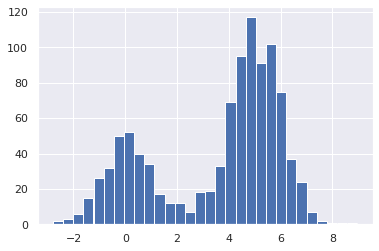

In [4]:
hist = plt.hist(x, bins=30)

In [5]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

391.7229234728167

In [6]:
x = data_gen(20)
bins = np.linspace(-5, 10, 10)
print(x)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  6.74481176  4.2387931   5.3190391   4.75062962  6.46210794  2.93985929
  4.6775828   4.61594565  6.13376944  3.90010873  4.82757179  4.12214158
  5.04221375  5.58281521]


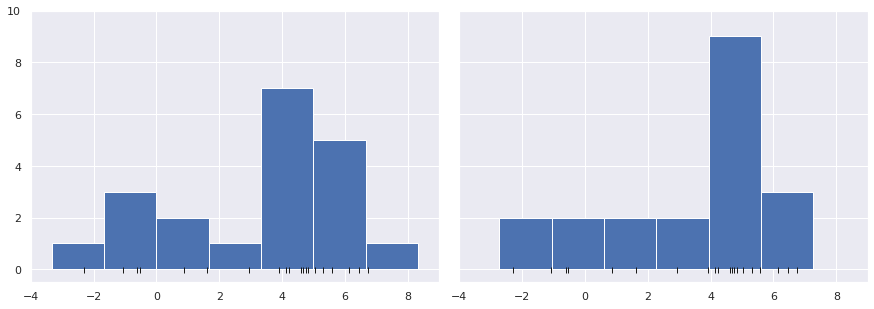

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9), 'ylim':(-0.5, 10)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

(-0.5, 8.0)

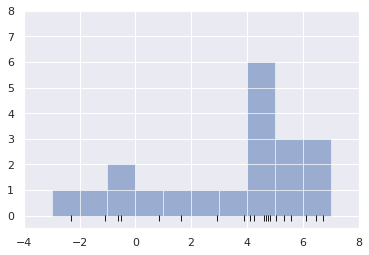

In [8]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.5, 8)

(-4.0, 8.0, -0.2, 8.0)

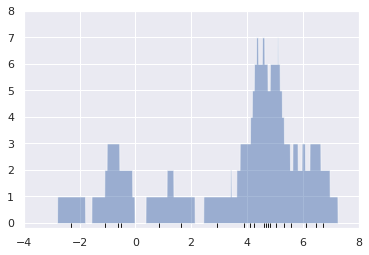

In [9]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

(-4.0, 8.0, -0.2, 5.0)

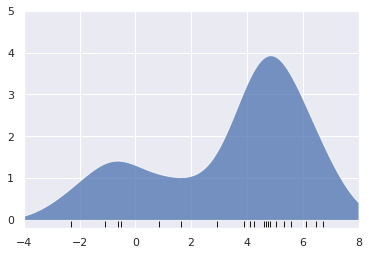

In [10]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.75)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5])

(-0.02, 0.22)

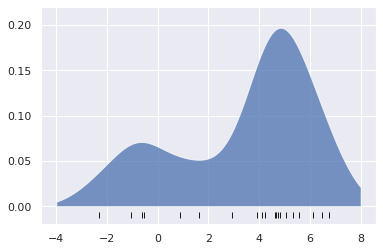

In [11]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1, kernel='gaussian')           #low bandwidth results into higher variance -> over-fitting
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.75)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [12]:
from sklearn.model_selection import GridSearchCV,LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

In [13]:
grid.best_params_

{'bandwidth': 1.1233240329780276}